# Check correlations

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from src.dataset.data import Dataset
from src.features.vesta_transformer import VestaTransformer
from src.visualization.visualize import plot_correlation_matrix, corrplot, corr_cluster_map

pd.options.display.max_rows = 100
pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
ds = Dataset()
ds.load_dataset()

In [6]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['isFraud'] = y

## Identity correlation

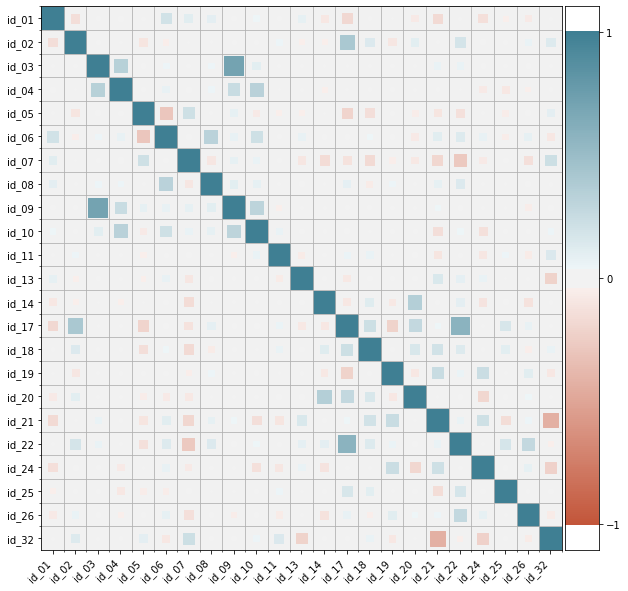

In [24]:
corrplot(X, ds.identity_cols)

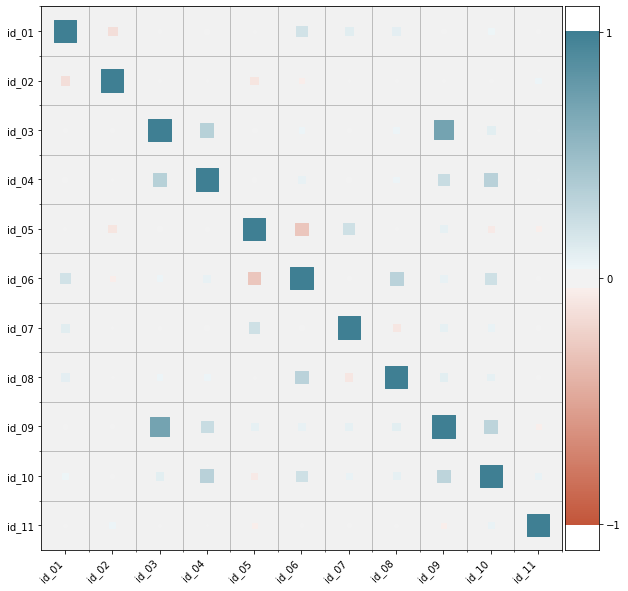

In [9]:
corrplot(X, ds.identity_cols[:11])

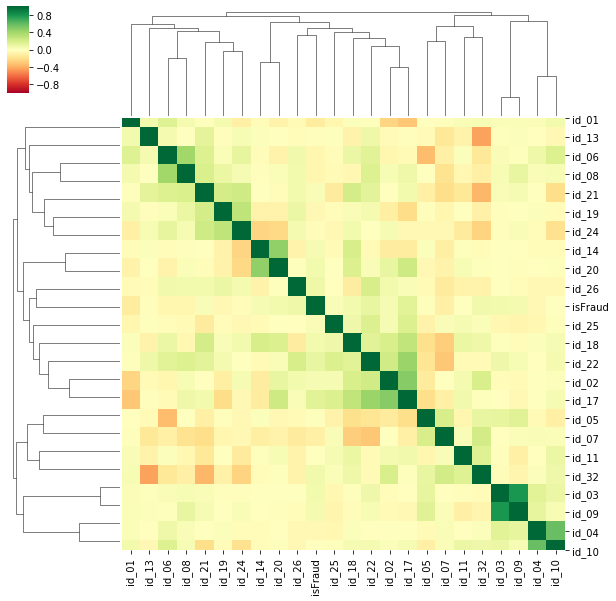

In [8]:
corr_cluster_map(X, ds.identity_cols + ['isFraud'])

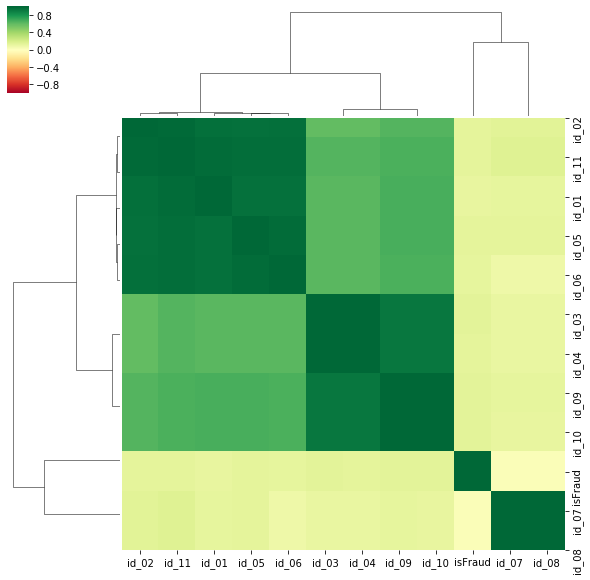

In [15]:
corr_cluster_map(X.fillna(-999), ds.identity_cols[:11] + ['isFraud'])

## Transaction columns

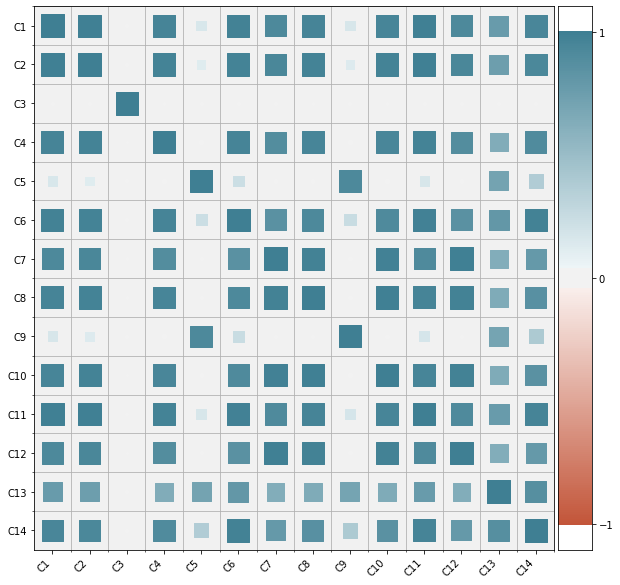

In [29]:
corrplot(X, [f"C{i}" for i in range(1, 15)])

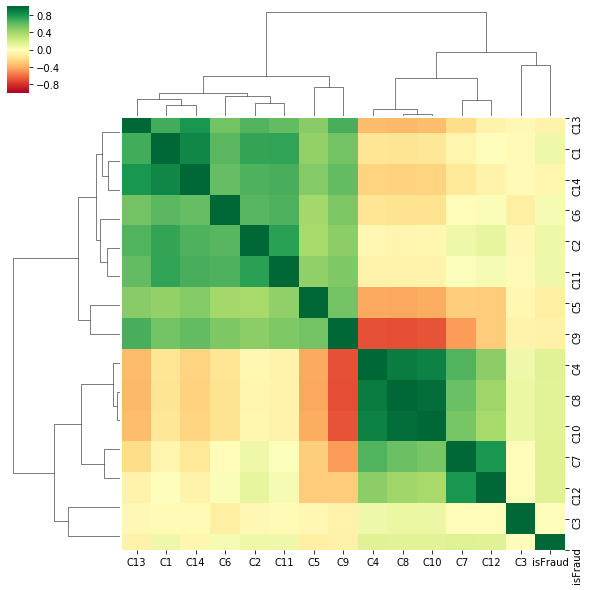

In [11]:
corr_cluster_map(X, [f"C{i}" for i in range(1, 15)] + ['isFraud'])

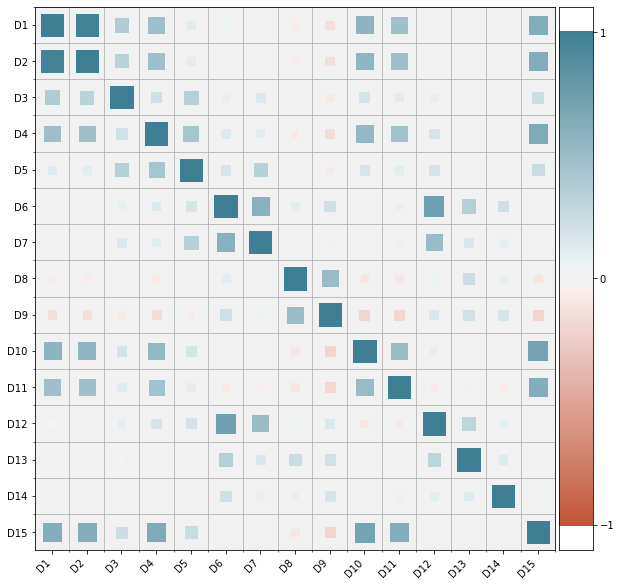

In [31]:
corrplot(X.fillna(-1), [f"D{i}" for i in range(1, 16)])

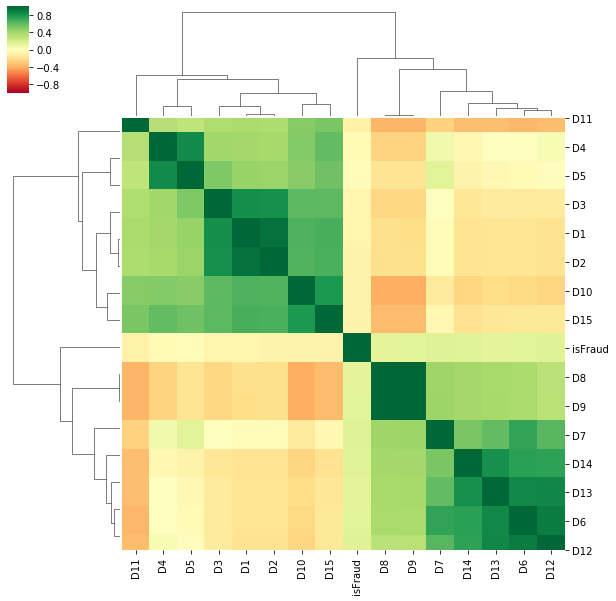

In [14]:
corr_cluster_map(X.fillna(-999), [f"D{i}" for i in range(1, 16)] + ['isFraud'])

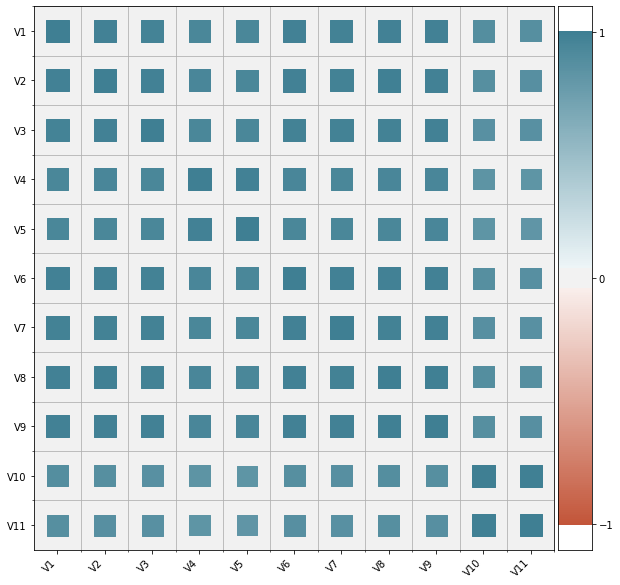

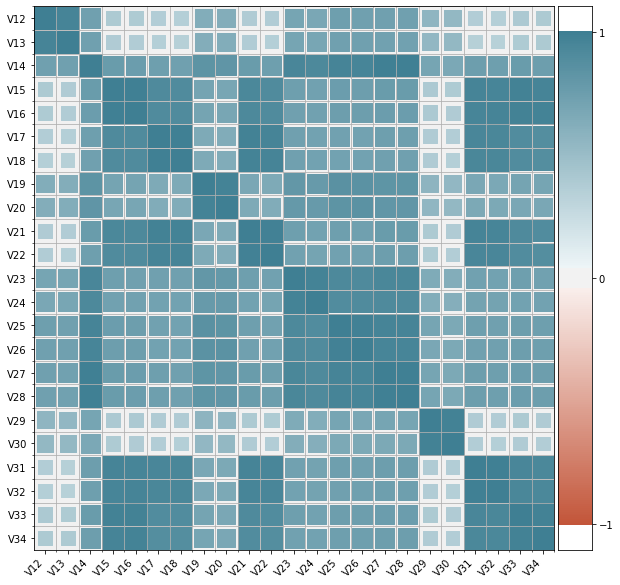

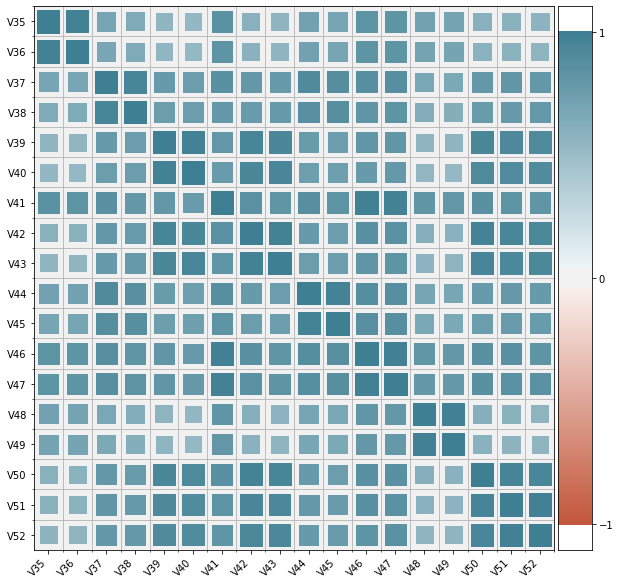

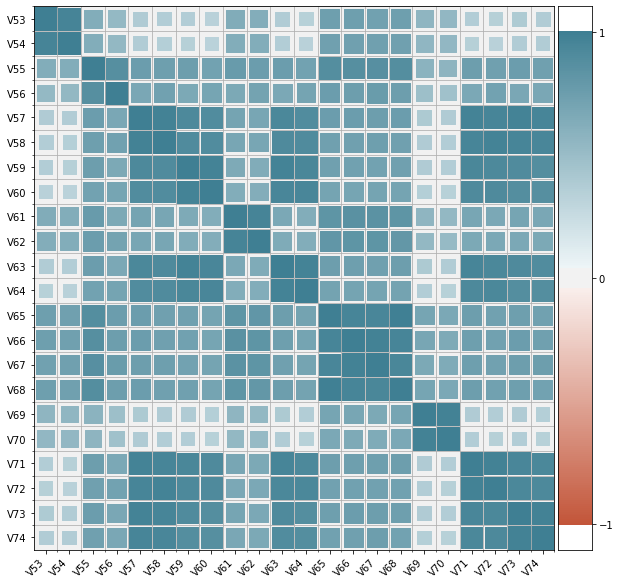

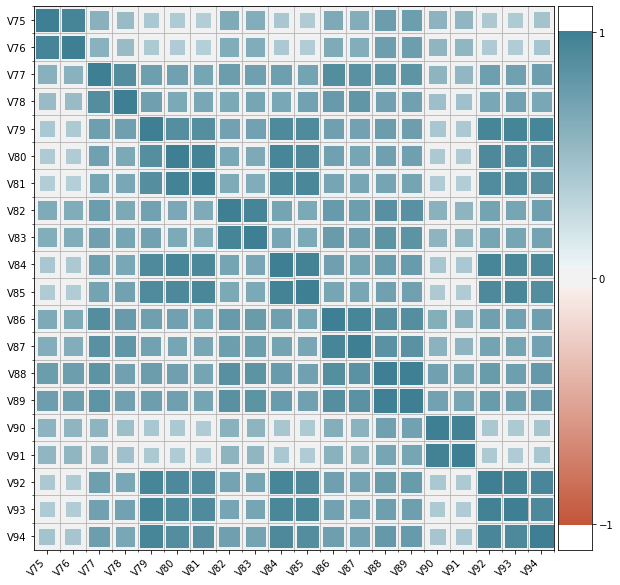

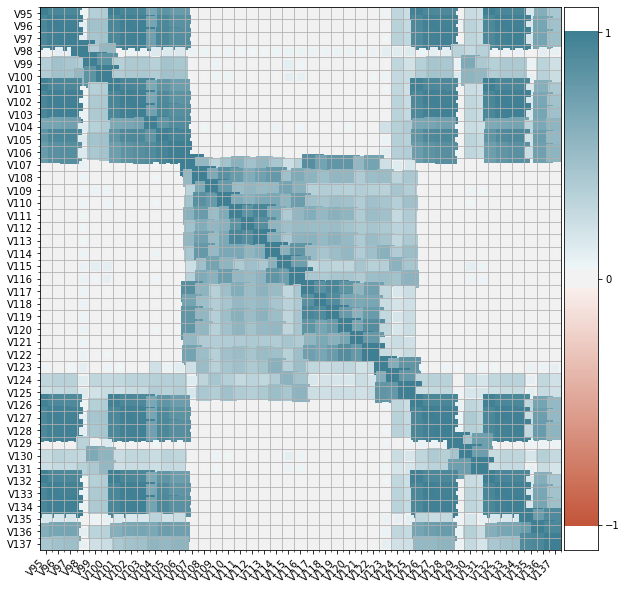

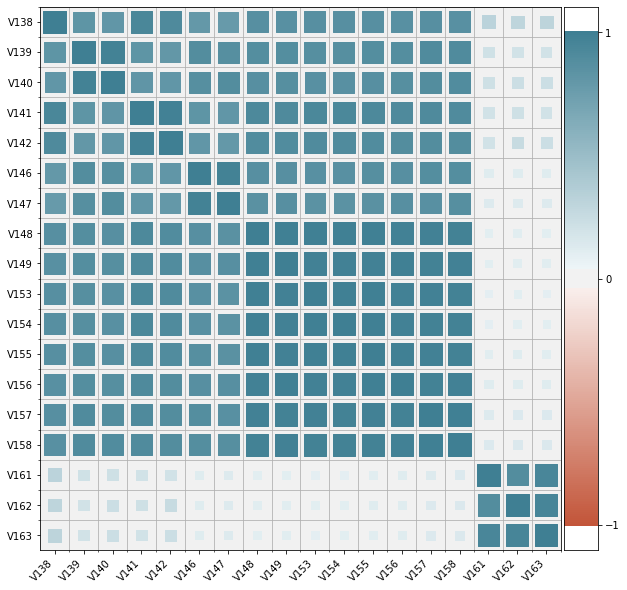

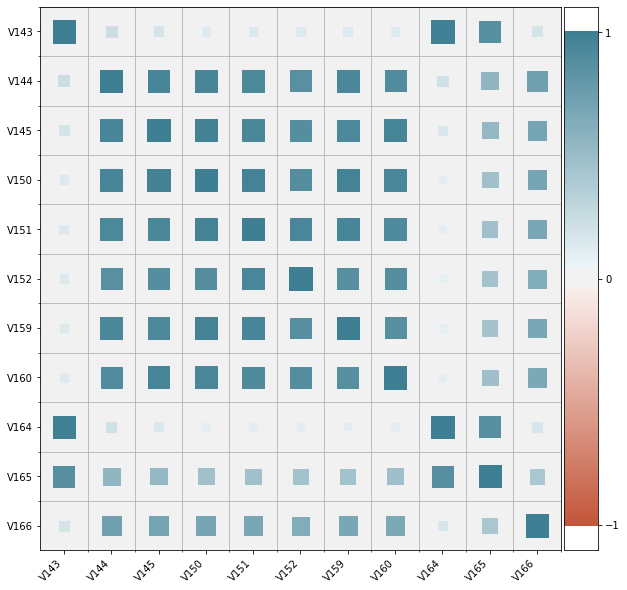

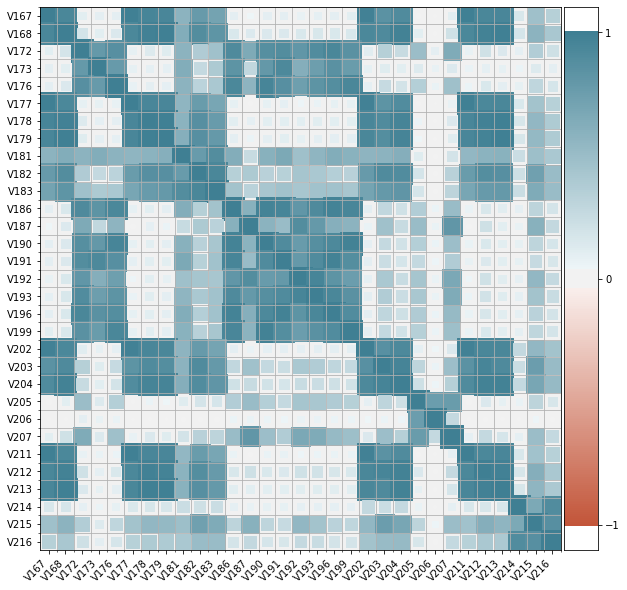

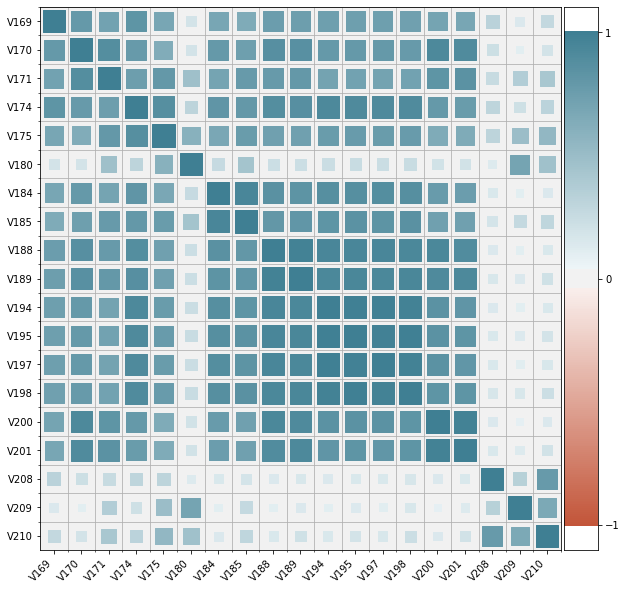

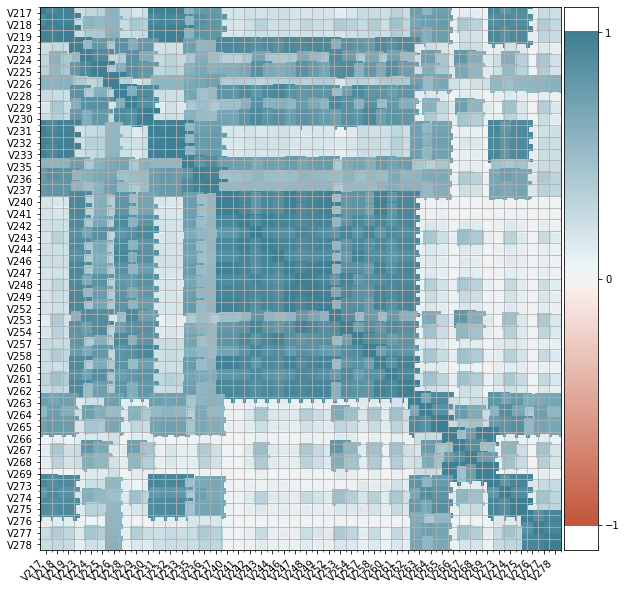

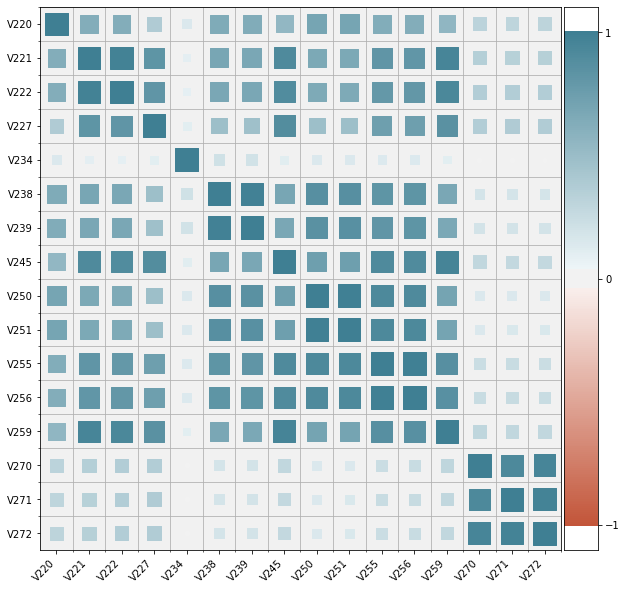

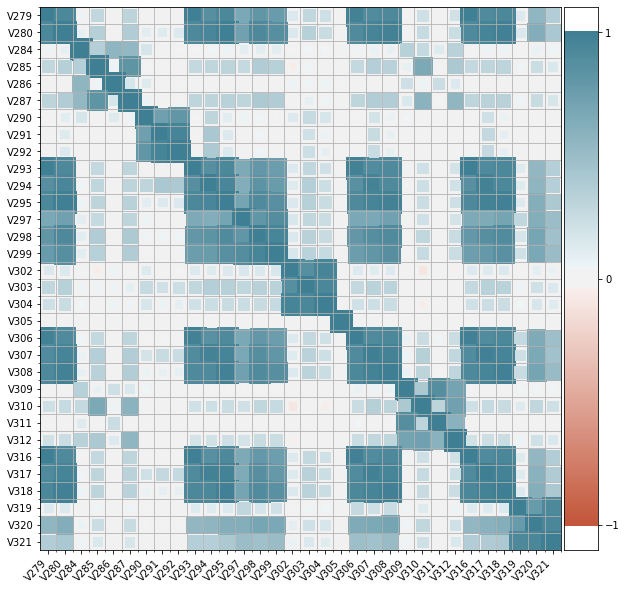

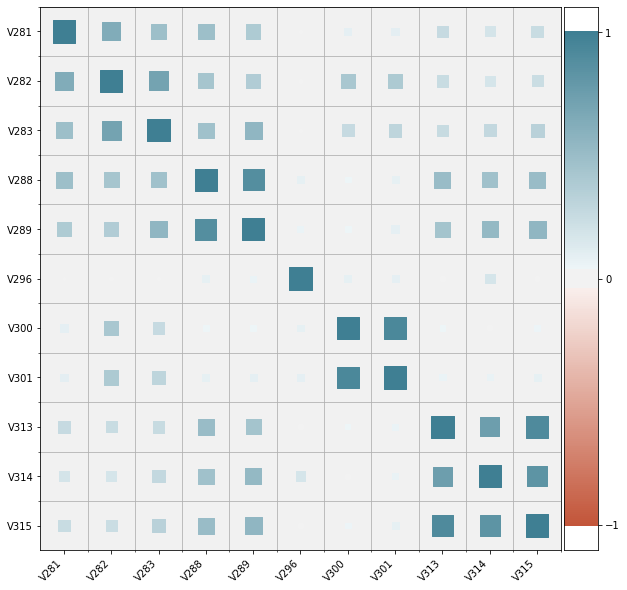

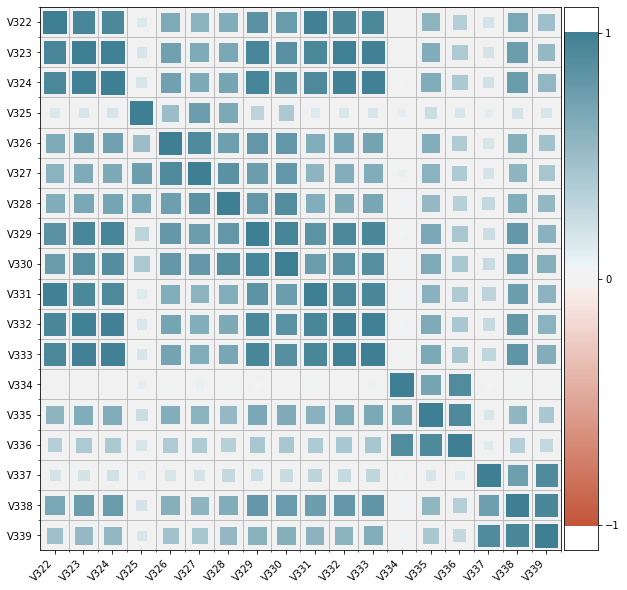

In [6]:
for group in VestaTransformer().V_groups:
    corrplot(X.fillna(-1), group)